# 1. 基础模型搭建

In [1]:
# %%
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader

# 检查GPU可用性
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载数据集
train_dataset = torchvision.datasets.KMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.KMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 创建数据加载器
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


# 基础模型定义

# %%
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 展平输入
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BaseModel().to(device)
print(model)

100%|██████████| 18.2M/18.2M [00:09<00:00, 1.94MB/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 325kB/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3.04M/3.04M [00:01<00:00, 1.84MB/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5.12k/5.12k [00:00<00:00, 7.22MB/s]


Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw

BaseModel(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## 训练函数定义

In [3]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_loss_history = []
    test_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # 验证阶段
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        train_loss_history.append(epoch_loss)
        test_acc_history.append(epoch_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Loss: {epoch_loss:.4f}, Test Acc: {epoch_acc:.2f}%")

    return train_loss_history, test_acc_history

## 基础模型训练

In [4]:

# 初始化模型和优化器
model = BaseModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练参数
num_epochs = 15

# 开始训练
base_loss, base_acc = train_model(
    model, train_loader, test_loader,
    criterion, optimizer, num_epochs
)

Epoch [1/15], Loss: 0.4430, Test Acc: 83.69%
Epoch [2/15], Loss: 0.2371, Test Acc: 84.10%
Epoch [3/15], Loss: 0.1788, Test Acc: 86.86%
Epoch [4/15], Loss: 0.1466, Test Acc: 88.35%
Epoch [5/15], Loss: 0.1269, Test Acc: 88.30%
Epoch [6/15], Loss: 0.1098, Test Acc: 90.15%
Epoch [7/15], Loss: 0.0997, Test Acc: 89.99%
Epoch [8/15], Loss: 0.0887, Test Acc: 90.54%
Epoch [9/15], Loss: 0.0830, Test Acc: 90.27%
Epoch [10/15], Loss: 0.0759, Test Acc: 90.67%
Epoch [11/15], Loss: 0.0727, Test Acc: 91.00%
Epoch [12/15], Loss: 0.0682, Test Acc: 91.32%
Epoch [13/15], Loss: 0.0628, Test Acc: 90.95%
Epoch [14/15], Loss: 0.0623, Test Acc: 91.67%
Epoch [15/15], Loss: 0.0583, Test Acc: 91.28%


# 2. 模型结构优化

In [5]:
#

# %%
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

## 训练改进模型

In [6]:
# 训练改进模型
improved_model = ImprovedModel().to(device)
optimizer = optim.Adam(improved_model.parameters(), lr=0.0005)

improved_loss, improved_acc = train_model(
    improved_model, train_loader, test_loader,
    criterion, optimizer, num_epochs
)

Epoch [1/15], Loss: 0.4915, Test Acc: 81.18%
Epoch [2/15], Loss: 0.2553, Test Acc: 85.46%
Epoch [3/15], Loss: 0.1938, Test Acc: 89.19%
Epoch [4/15], Loss: 0.1608, Test Acc: 88.87%
Epoch [5/15], Loss: 0.1374, Test Acc: 89.72%
Epoch [6/15], Loss: 0.1224, Test Acc: 90.33%
Epoch [7/15], Loss: 0.1138, Test Acc: 90.93%
Epoch [8/15], Loss: 0.1013, Test Acc: 90.63%
Epoch [9/15], Loss: 0.0907, Test Acc: 90.88%
Epoch [10/15], Loss: 0.0850, Test Acc: 90.64%
Epoch [11/15], Loss: 0.0788, Test Acc: 91.35%
Epoch [12/15], Loss: 0.0754, Test Acc: 91.40%
Epoch [13/15], Loss: 0.0698, Test Acc: 91.52%
Epoch [14/15], Loss: 0.0681, Test Acc: 92.40%
Epoch [15/15], Loss: 0.0627, Test Acc: 90.92%


# 学习率对比实验

In [8]:
# ## 超参数实验

# %%
print(device)
learning_rates = [0.1, 0.01, 0.001, 0.0001]
lr_results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = BaseModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    _, acc = train_model(model, train_loader, test_loader,
                        criterion, optimizer, num_epochs=10)
    lr_results[lr] = acc

# 批次大小对比实验
batch_sizes = [32, 64, 128, 256]
bs_results = {}

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}")
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    model = BaseModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    _, acc = train_model(model, train_loader, test_loader,
                        criterion, optimizer, num_epochs=10)
    bs_results[bs] = acc

cuda

Training with learning rate: 0.1
Epoch [1/10], Loss: 39.4436, Test Acc: 9.99%
Epoch [2/10], Loss: 60.7800, Test Acc: 10.06%
Epoch [3/10], Loss: 62.4138, Test Acc: 10.24%
Epoch [4/10], Loss: 74.5421, Test Acc: 10.38%
Epoch [5/10], Loss: 53.6400, Test Acc: 10.05%
Epoch [6/10], Loss: 67.7777, Test Acc: 10.15%
Epoch [7/10], Loss: 118.7387, Test Acc: 10.61%
Epoch [8/10], Loss: 181.0169, Test Acc: 10.27%
Epoch [9/10], Loss: 187.0396, Test Acc: 10.64%
Epoch [10/10], Loss: 113.8216, Test Acc: 10.14%

Training with learning rate: 0.01
Epoch [1/10], Loss: 0.7750, Test Acc: 71.41%
Epoch [2/10], Loss: 0.6197, Test Acc: 73.04%
Epoch [3/10], Loss: 0.5921, Test Acc: 73.98%
Epoch [4/10], Loss: 0.5638, Test Acc: 75.45%
Epoch [5/10], Loss: 0.5296, Test Acc: 74.71%
Epoch [6/10], Loss: 0.5477, Test Acc: 76.85%
Epoch [7/10], Loss: 0.5317, Test Acc: 75.65%
Epoch [8/10], Loss: 0.5267, Test Acc: 74.57%
Epoch [9/10], Loss: 0.4917, Test Acc: 78.05%
Epoch [10/10], Loss: 0.4869, Test Acc: 77.42%

Training w

# 绘制准确率对比

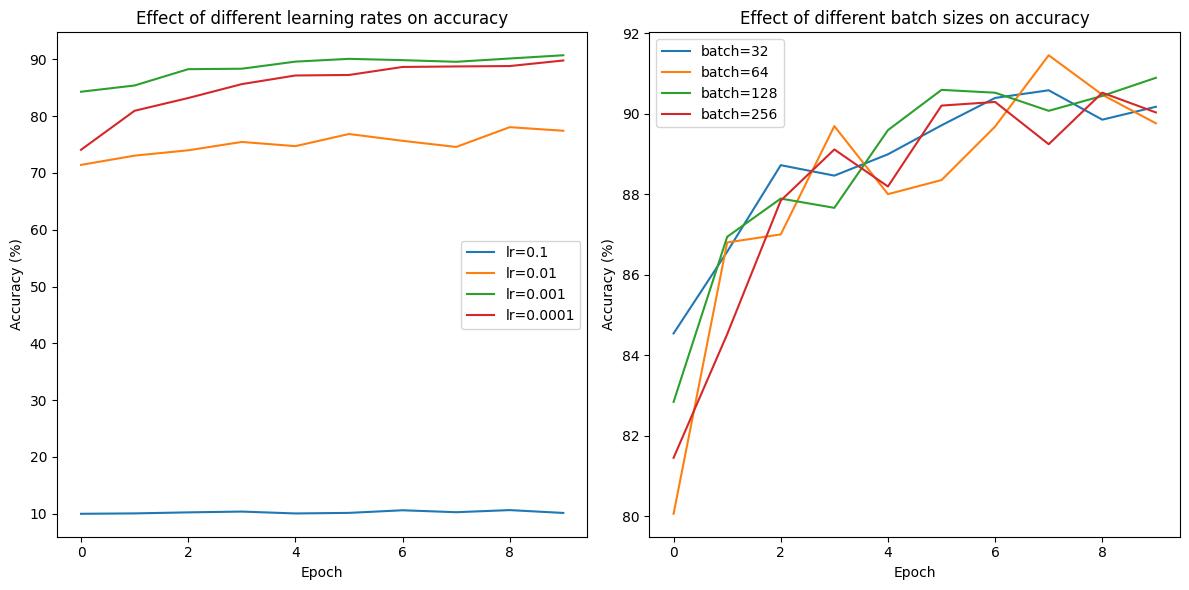

In [10]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for lr, acc in lr_results.items():
    plt.plot(acc, label=f'lr={lr}')
plt.title('Effect of different learning rates on accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
for bs, acc in bs_results.items():
    plt.plot(acc, label=f'batch={bs}')
plt.title('Effect of different batch sizes on accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()